# Kyle Corcoran
# Computational Project 03 and 04
# 12/3/18

## Introduction

In class we have been looking at finite models of strings, and we have also used the Finite Difference Method, Finite Element Mehtod, and Wave Equation to explore these systems.  I decided to further explore some initial conditions using different superpositions of waves and see how that caused a system to evolve.  I also incorporated a free-ended Gaussian model becuase it gave me some extra inspiration to observe how different systems evolved.  A lot of the code included is code that we have written in class for examining the behavior of strings, so I will provide as much explanation as possible as to what each code segment does; I will also make sure to explain which of the code chunks I wrote specifically for this project and what they do. First I want to go into the theory behind the code that is to come later in the notebook.

# Theory for Free-Ended Gaussian

##### Wave Equation
With no external load, the displacement of a string at location $x$ and time $t$ is given by

$$F_T\frac{\partial u^2(x,t)}{\partial x^2}=\rho \frac{\partial u^2(x,t)}{\partial t^2}$$

where $F_T$ is the tension and $\rho$ is the linaer density $M/L$ of the string.  This can be written

$$\frac{\partial u^2(x,t)}{\partial x^2}= \frac{1}{v^2} \frac{\partial u^2(x,t)}{\partial t^2}$$

where $v=\sqrt{F_T/\rho}$.

##### FDM Solution
Write each second derivative using FDM approximation. The second order approximation of the second partial derivative with respect to $x$ is

$$\frac{\partial u^2(x,t)}{\partial x^2} \approx \frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{h^2}$$

The second order approximation of the second partial derivative with respect to $t$ is

$$\frac{\partial u^2(x,t)}{\partial t^2} \approx \frac{u(x,t+\Delta t)-2u(x,t)+u(x,t-\Delta t)}{\Delta t^2}$$

Use the subscript $m$ to indicate the $m^{th}$ index of the grid position $x_m$. Use the superscript $n$ to indicate the $n^{th}$ step in time. Then the wave equation is

$$\frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{h^2} = \frac{1}{v^2} \frac{u(x,t+\Delta t)-2u(x,t)+u(x,t-\Delta t)}{\Delta t^2}$$

$$\frac{u_{m-1}^n-2u_{m}^n+u_{m+1}^n}{h^2} = \frac{1}{v^2} \frac{u_{m}^{n-1}-2u_{m}^n+u_{m}^{n+1}}{\Delta t^2} $$


The indices with $m$ represent grid points. The superscripts with $n$ are the evolution in time. The goal is to step forward in time. Thus, solve for $u_{m}^{n+1}$.

$$u_{m}^{n+1} = 2(1-\beta^2)u_m^n - u_m^{n-1} + \beta^2(u_{m-1}^n+u_{m+1}^n)$$

where $\beta=\frac{v\Delta t}{h}$. To evolve in time, we use two arrays to hold the solutions to $u(x)$ at all grid points at times $t_{n-1}$ and $t_n$, advance the solution to $t_{n+1}$ and store it in a third array, then swap the appropriate arrays to advance to $t_{n+2}$, and so on.

# Theory for Finite Model of a String

Instead of going through the N-atoms theory, I thought it would be beneficial to see the theory for just three masses, knowing that the process is the same modulo a larger matrix for the N-atoms case.  For three masses connected by four springs and two walls at the boundaries, the equations of motion for the displacement $u_i$ for each mass $m_i$ are:

$$m_1\ddot{u}_1 = -ku_1-k(u_1-u_2)=-2ku_1+ku_2$$

$$m_2\ddot{u}_2 = -k(u_2-u_1)-k(u_2-u_3)=ku_1-2ku_2+ku_3$$

$$m_3\ddot{u}_3 = -k(u_3-u_2)-ku_3=ku_2-2ku_3$$

Let's assume the masses oscillate vertically. In this case $k=F_T/L_0$ where $F_T$ is the tension in the "string" and $L_0$ is the nominal distance between masses ("atoms").

Suppose that there is a set of initial conditions that results in motion where each mass oscillates with a frequency $\omega$ and the displacement of each mass $m_i$ is described by a single sinusoidal function:

$$u_i = a_i \cos(\omega t + \phi)$$

Substituting this into the differential equations above gives:

$$2ka_1-ka_2 + 0 = m_1\omega^2a_1$$

$$-ka_1+2ka_2 - ka_3 = m_2\omega^2a_2$$

$$0 -ka_2 + 2ka_3 = m_3\omega^2a_3$$

It is written in this way to make it more obvious that we can express these equations with matrices.

$$
\left[ {\begin{array}{ccc}
   2k & -k & 0 \\
   -k & 2k & -k \\
   0 & -k & 2k \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
  = \omega^2
\left[ {\begin{array}{ccc}
   m_1 & 0 & 0 \\
   0 & m_2 & 0 \\
   0 & 0 & m_3 \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
$$

Define $\lambda=\omega^2$, then

$$[A-\lambda B]\vec{a}$$

where $\lambda$ is called the eigenvalue and $\vec{a}$ is called the eigenvector. To find the frequencies, solve for the eigenvalues using

$$\det\left[ A-\lambda B\right]=0$$

$$\left | {\begin{array}{ccc}
   2k-\lambda m_1 & -k & 0 \\
   -k & 2k-\lambda m_2 & -k \\
   0 & -k & 2k-\lambda m_3 \\
  \end{array} } \right |$$
  
There are three eigenvalues. Substitute each eigenvalue back into the equations of motion above and solve for its corresponding eigenvector:

$$ \vec{a}=
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
$$

Write the general analytic solution for the triatomic molecule as a sum of the normal modes.

$$
\left[ {\begin{array}{c}
    u_1 \\
    u_2 \\
    u_3 \\
  \end{array} } \right]
  = A_0
\left[ {\begin{array}{c}
    a_{00} \\
    a_{10} \\
    a_{20} \\
  \end{array} } \right]
  \cos(\omega_0t + \phi_0)
+ A_1
\left[ {\begin{array}{c}
    a_{01} \\
    a_{11} \\
    a_{21} \\
  \end{array} } \right]
  \cos(\omega_1t + \phi_1)
+ A_2
\left[ {\begin{array}{c}
    a_{02} \\
    a_{12} \\
    a_{22} \\
  \end{array} } \right]
  \cos(\omega_1t + \phi_2)
$$

The constants $A_0,\ A_1,\ A_2, \phi_0,\ \phi_1,\ \phi_2$ depend on the initial conditions of the atoms.

First, let's set the initial velocities of all atoms to zero so the phases are zero.


Now, let's solve for $A_0,\ A_1,\ A_2$ based on the initial positions of the atoms. At $t=0$, 

$$u_1=u_{1i}=A_0a_{00} + A_1a_{01} + A_2a_{02}$$

$$u_2=u_{2i}=A_0a_{10} + A_1a_{11} + A_2a_{12}$$

$$u_3=u_{3i}=A_0a_{20} + A_1a_{21} + A_2a_{22}$$

We have three equations and three unknowns. Use linear algebra.

$$
\left[ {\begin{array}{ccc}
   a_{00} & a_{01} & a_{02} \\
   a_{10} & a_{11} & a_{22} \\
   a_{20} & a_{21} & a_{22} \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    A_0 \\
    A_1 \\
    A_2 \\
  \end{array} } \right]
  = 
\left[ {\begin{array}{c}
    u_{1i} \\
    u_{2i} \\
    u_{3i} \\
  \end{array} } \right]
$$

The numpy function `numpy.linalg.solve()` will solve this equation and return the coefficients:

$$
\left[ {\begin{array}{c}
    A_0 \\
    A_1 \\
    A_2 \\
  \end{array} } \right]
$$

Using these same concepts, we can generalize the sysem to N-atoms and use the model to analyze a super-position of waves.

# Creating the Code

Now that we have all the theory to solve these situations, we can create the models with our code.

### Packages and Functions

There are a lot different functions that are necessary for conducting this project, so I'm going to explain what all of them do.  Below are some fairly standard packages that we are using to do math and plot things.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import ode
from scipy.optimize import curve_fit
from scipy.linalg import eigh

These two functions below are used for the free ended Gaussian.  The gaussian funciton is used to make a Gaussian shape on the string, and the wavemotion moves the Gaussian to the right.

In [2]:
def wavemotion(u0, u1):
    u2 = 2*(1-b)*u1 - u0                     # unshifted terms 
    u2[1:-1] += b*( u1[0:-2] + u1[2:] )      # left, right 
    return u2

def gaussian(x):
    return np.exp(-(x-5)**2)


The below is used to play the videos of the animations we will make.

In [3]:
from IPython.display import HTML

def playVideo(path):
    return HTML("""
                <video width="320" height="240" controls>
                  <source src="{}" type="video/mp4">
                </video>
                """.format(path))

Used to animate the evolution of the systems.

In [4]:
from mplEasyAnimate import animation
from tqdm import tqdm

The below animates the motion of the Gaussian as it moves through time.

In [5]:
def easyanimate_gauss(t_array, u_array, filename):
    xa = np.linspace(0., L, N+1)

    t_offsets = t_array
    anim = animation(filename)
    i=0
    for offset in tqdm(t_offsets):
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        ax.plot(xa, u_array[i,:])
        ax.set_xlim(0,L)
        ax.set_ylim(-2,2)
        
        anim.add_frame(fig)
        plt.close(fig)
        i=i+1
    anim.close()  

The below function goes through the wave that I generate and solves for the coefficients of the individual sine waves.  This function is building matrices that it will go through and find the eigenvalues and eigenvectors for, also acquiring the eigenfrequencies for each normal mode.  The eigenfrequencies and normal mode coefficients will play a role later in the project.

In [6]:
def normal_modes(Natoms, ks, mass, ui, udoti, t_total):
    global N, k, m
    N=Natoms
    k=ks
    m=mass
    
    #Build matrices
    A=np.zeros((Natoms,Natoms))

    for i in range(Natoms):
        A[i,i] = 2*ks
        if i==0:
            A[0,i+1]=-ks
        elif i==Natoms-1:
            A[i,i-1]=-ks
        else:
            A[i,i-1]=-ks
            A[i,i+1]=-ks

    B=mass*np.identity(Natoms)

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B)        # eigenvalues and eigenvectors  
    #print("eigenvalues (omega^2):", lamb)
    #print("eigenvectors are column vectors in:\n\n", a)

    #Find coefficients for normal modes
    Acoeffs = np.linalg.solve(a,ui)

    #print(Acoeffs)
    
    #build the general solution
    t = np.linspace(0,t_total,1000)

    omegas = np.sqrt(lamb)
    u_atoms = np.zeros((Natoms,len(t)))

    for i in range(Natoms):
        for w in range(0,len(omegas)):
            u_atoms[i] = u_atoms[i] + Acoeffs[w]*a[i,w]*np.cos(omegas[w]*t)

    return omegas, a, u_atoms, t, Acoeffs

This funciton can be used to plot the different normal modes that the system has. You simply pass the mode that you want along with the eigenfrequencies and eigenvectors, and it will plot that mode for you.

In [7]:
def plot_mode_teq0(mode, freqs, vecs): #plot normal mode at t=0
    
    u_mode = vecs[:,mode]
    u_mode_with_boundary=np.insert(u_mode,0,0) #add 0 to beginning of array
    u_mode_with_boundary=np.append(u_mode_with_boundary,0) #add 0 to end of array
    xa = np.linspace(0,L,Natoms+2)
        
    plt.figure()
    plt.title("normal mode %d" % mode)
    plt.plot(xa,u_mode_with_boundary, 'b-', label='u_i')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend(loc='lower right')
    plt.show()


This function plots the normal mode of the equation at $t = 0$.  This allows us to see how the function starts before we evlove it in time.

In [8]:
def plot_ui0(u_i): #plot normal mode at t=0
    
    u_with_boundary=np.insert(u_i,0,0) #add 0 to beginning of array
    u_with_boundary=np.append(u_with_boundary,0) #add 0 to end of array
    xa = np.linspace(0,L,Natoms+2)
        
    plt.figure()
    plt.title("u (t=0)")
    plt.plot(xa,u_with_boundary, 'b-', label='u')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend(loc='lower right')
    plt.show()

This is a function that I wrote which will give you the ability to generate an arbitrary amount of sine waves with arbitrary coefficients that add together in superposition. The reason that this is useful is to create systems that have interesting intial conditions which evolve in time much differently than waves created by a normal string or even a plucked string.  In principle, one could create any function to evolve in time; however, I was interested in how large superpositions of sine waves would behave.  Also, by giving the indivual waves random coefficients, we can use a technique to extract the coefficients.  This method, which is similar to taking a Fourier Transform in many ways, could be useful when one might wish to determine parameters of a system using linear algebra rather than large scale Fourier Series.

In [15]:
def make_sin(xi,L,Num): #passes the xpositions of the wave, the length of the string, and the possible number of sine waves
    sines = []          #that one would potentially want to create a superposition of.
    j=1
    while j<Num:
        sines.append(j)  #creates a list of possible number of sine waves to be summed
        j+=1
    N = np.random.choice(sines)  #chooses at random the number of waves that will be summed
    i=1
    u_i=0
    Ams = []
    while i<N: # this loop creates and sums the waves together
        e = np.random.choice([-2,-1,1,2])  #randomly assigns coefficients - each is multiplied by something from the left 
        A = e*np.random.rand(1)            #array to help make the coefficients stand out a little more
        #print(A)
        new = A*np.sin((i*np.pi/L)*xi)
        u_i= u_i+new
        #print(u_i)
        Ams.append(A)
        i+=1
    
    return N, u_i  #returns the Number of waves used and the time evolution of the system

This function uses the module mplEasyAnimate created by Thomas Boudreaux to create an animation which shows how the system evolves over time.  

In [10]:
def easyanimate_string(t_array, u_array, filename):
    xa = np.linspace(L0,L-L0,Natoms)

    t_offsets = t_array
    anim = animation(filename)
    i=0
    for offset in tqdm(t_offsets):
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        ax.plot(xa, u_array[:,i])
        ax.set_xlim(0,L)
        ax.set_ylim(-4,4) #i made this large but may need to be changed depending on the wave 
        
        anim.add_frame(fig)
        plt.close(fig)
        i=i+1
    anim.close()  

### Free ended Gaussian

This is the code that originally inspired me to work with large superpositions of waves.  I spent quite a while identifying the boundary conditions in this code from our notebook 03-05 where we solved the wave equation for a string.  To create a free end, I added a statement which sets the last element of the array to be the same as the second to last value rather than assuming it is zero like before.  This allowed the string to evolve with the Gaussian moving to the right while changing the way it behaved at the boundary.  Instead of reflecting off the boudnary as it does with the fixed one on the left, the Gaussian acts as a seeming superposition of two Gaussians passing through each other from opposite directions.  This is why the amplitude increases largely before the Gaussian appears to travel backwards toward the left.

In [11]:
L, N = 10, 100           # length of string, number of intervals
b = 1.0                    # beta^2
h = L/N

t_total = 20
N_t = 200 #number of time intervals
dt = t_total/N_t
t = 0
ta = np.linspace(0,t_total,N_t+1)

x = np.linspace(0, L, N+1)
u0 = gaussian(x)
u1 = gaussian(x-b*h)

data = np.zeros((N_t+1,N+1))  #columns are u at grid points
data[0]=u0
data[1]=u1

for i in range(N_t):
    u2 = wavemotion(u0, u1)
    u2[N]=u2[N-1]  #creates the free end
    u0, u1 = u1, u2
    data[i]=u2

data.shape


(201, 101)

In [12]:
file='free_end_gauss.mp4'
easyanimate_gauss(ta,data,file)

100%|████████████████████████████████████████████████████████████████████████████████| 201/201 [00:43<00:00,  4.60it/s]


In [13]:
playVideo(file)

## Evolving a superpostion of waves

In this section, I have modified some of the code from our 03-03 finite models of string code to create and evolve a superposition of waves with random coefficients.  This process is interesting as it presents us with the opportunity to explore extremely unique initial conditions of a system.  

In addition, we have written code that uses linear algebra to solve for the eigenvalues, eigenfrequencies, eigenvectors, and coefficients of waves, which allows us to extract useful information from a system without knowing the conditions that created it.  This is done through a process similar to a Fourier Transform; after I solve for the eigenfrequencies and coefficients, I can make a plot of amplitude vs. eigenfrequency which tells me the conditions that created the system that we want to evolve.  This could be a useful method for understanding system and pulling out resonant modes of different systems without committing to full FTs.  

I also evolve the system over time, seeing if any interesting conditions emerge.  The initial conditions of these more complex systems give rise to very interesting time evolutions.  As when you run the code below it creates a new system every time, I have not modularized it.  Simply rerunning the cells accomplishes the same task quicker and in less time that retyping in my opinion.  I highly encourage you to see how these systems evolve and see if you can get a sense for how the waves might react differently than simpler systems.

In [19]:
Natoms = 50
ks = 1
mass = 1
L = 1
L0 = L/(Natoms+1)
F_T = ks*L0
t_tot = 5*10*np.pi

xi=np.linspace(L0,L-L0,Natoms)

Nsin,u_i = make_sin(xi,L,15)  #i have passed in 15, so you could potentially get a 15 sine wave superpostion
udot_i = np.zeros(Natoms)     #keep in mind that the N you pass must be less than or equal to the number for Natoms.
#print(u_i)                     you can change the number if you would like larger superpositions
eig_freq, eig_vec, u, ta,As = normal_modes(Natoms, ks, mass, u_i, udot_i, t_tot)
print('The number of waves in superposition is',Nsin)

The number of waves in superposition is 12


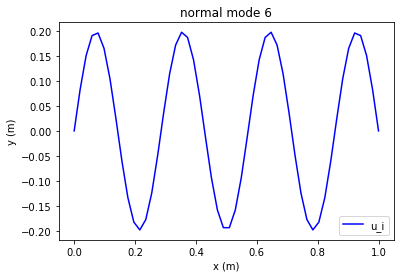

In [21]:
plot_mode_teq0(6,eig_freq,eig_vec) #allows you to plot different normal modes - just change the number to which mode you want

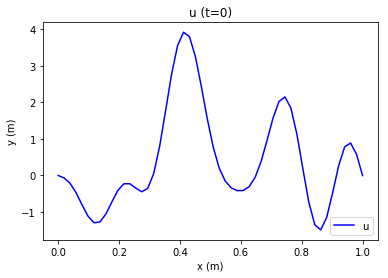

In [22]:
plot_ui0(u_i)  #creates a plot of the system at t=0

Below is the code that creates a plot of amplitude vs. eigenfrequency.  This will look similar to an FT because it is showing the coefficient that went into creating each sine wave for each of the normal modes.

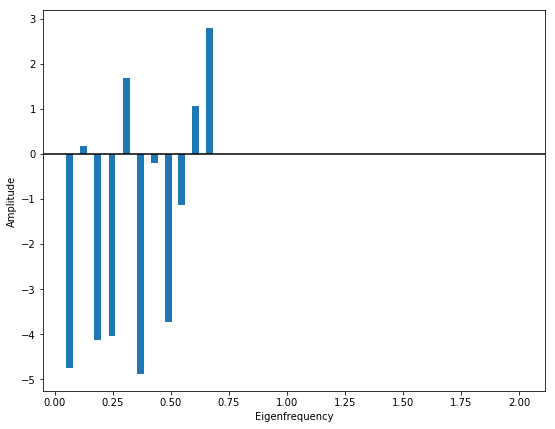

In [23]:
plt.figure(figsize=(9,7))
plt.bar(eig_freq,As,align='center',width=0.03)
plt.axhline(0,color='black')
plt.xlabel('Eigenfrequency')
plt.ylabel('Amplitude')

In [24]:
file='time_evolution.mp4'
easyanimate_string(ta,u,file)  #animates the time-evolution - keep in mind that you may need to change the ylim in 
                               #the function to see what is happening for different systems

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:43<00:00,  4.47it/s]


In [25]:
playVideo(file)

# Summary
I set out to further analyze how initial conditions affect string models with varying numbers of waves.  I first showed you the code that inspired me to pursue this project by creating a free-ended Gaussian model that moved and evolved over time.  I then created a function that generated a superposition of waves, and I used linear algebra to solve for many parameters of the system, creating a plot of amplitude vs. eigenfrequency that works similarly to a Fourier transform.  These systems show interesting time evolutions, so I hope that you find fun in reruninng the code to get different superpostions and time evolutions.